In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

In [4]:
clistfile = 'color_list.csv'
# change this
pic_file = 'lego.png'
#pic_file = 'sunset_painting.jpeg'

#dont need to change these
repo_path = os.path.dirname(os.getcwd())
img_path = '/img'
testfile = repo_path + img_path + '/' + pic_file

In [5]:
# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

In [6]:
PATH = testfile

In [7]:
WIDTH = 128
HEIGHT = 128
CLUSTERS = 4

In [8]:
image = Image.open(PATH)

In [9]:
image.size

(363, 238)

In [10]:
print("Loaded {f} image. Size: {s:.2f} KB. Dimensions: ({d})".format(
        f=image.format, s=os.path.getsize(PATH) / 1024, d=image.size))

Loaded PNG image. Size: 184.37 KB. Dimensions: ((363, 238))


In [11]:
def calculate_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
    return new_width, new_height

In [12]:
calculate_new_size(image)

(128, 83)

In [13]:
new_width, new_height = calculate_new_size(image)

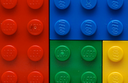

In [14]:
image.resize((new_width, new_height), Image.ANTIALIAS)

In [15]:
image = image.resize((new_width, new_height), Image.ANTIALIAS)

In [16]:
img_array = np.array(image)

In [17]:
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

ValueError: cannot reshape array of size 42496 into shape (10624,3)

In [18]:
model = KMeans(n_clusters=CLUSTERS)

In [115]:
labels = model.fit_predict(img_vector)

In [116]:
label_counts = Counter(labels)

In [117]:
total_count = sum(label_counts.values())

In [118]:
hex_colors = [
    rgb2hex(center) for center in model.cluster_centers_
]
hex_colors

['#017722', '#e0e1e2', '#d66a18', '#4d68a6']

In [119]:
list(zip(hex_colors, list(label_counts.values())))

[('#017722', 2946), ('#e0e1e2', 3234), ('#d66a18', 2933), ('#4d68a6', 359)]

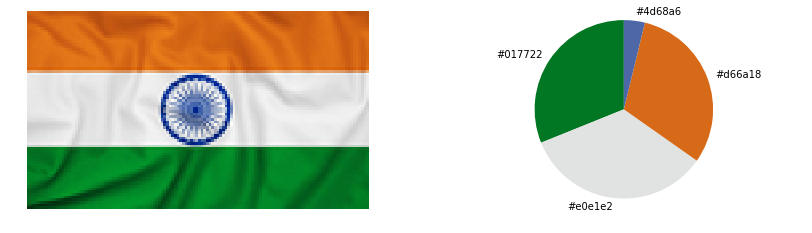

In [120]:
plt.figure(figsize=(14, 8))
plt.subplot(221)
plt.imshow(image)
plt.axis('off')

plt.subplot(222)
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_], startangle=90)
plt.axis('equal')
plt.show()